In [1]:
from src.autoencoders.vae import VariationalAutoEncoder
from src.utils.utils import get_training_and_validation_sets_gray_scale, get_test_set_gray_scale, loss_function, save_latent_vectors

c:\Users\giuli\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
c:\Users\giuli\anaconda3\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [2]:
X_train, Y_train, cX_train, X_val, Y_val, cX_val = get_training_and_validation_sets_gray_scale()
X_test, Y_test, cX_test = get_test_set_gray_scale()

In [11]:
vae = VariationalAutoEncoder(
        input_dim=[1, 64, 64],
        latent_dim=1280,
        n_filters=[3, 5, 5, 3],
        kernel_size=[32, 16, 3, 1],
        stride=[2, 2, 1, 1],
        padding=['same', 'same', 'same', 'same'],
        hidden_dims=[2560],
        activation='relu',
        learning_rate=0.001,
        dropout=0.4,
        alpha=0.3, # LeakyReLU alpha
        loss_function=loss_function,
        patience=10,
        metrics=['mse', 'mae']
)

In [12]:
vae.train(X_train, X_val, epochs=4, batch_size=32)

Epoch 1/4
136/136 [==============================] - 77s 538ms/step - loss: 0.3087 - mse: 0.0866 - mae: 0.2772 - val_loss: 0.2319 - val_mse: 0.0482 - val_mae: 0.2067
Epoch 2/4
136/136 [==============================] - 83s 614ms/step - loss: 0.1549 - mse: 0.0254 - mae: 0.1375 - val_loss: 0.0833 - val_mse: 0.0104 - val_mae: 0.0719
Epoch 3/4
136/136 [==============================] - 128s 942ms/step - loss: 0.0573 - mse: 0.0069 - mae: 0.0481 - val_loss: 0.0498 - val_mse: 0.0057 - val_mae: 0.0425
Epoch 4/4
136/136 [==============================] - 135s 991ms/step - loss: 0.0418 - mse: 0.0046 - mae: 0.0352 - val_loss: 0.0383 - val_mse: 0.0040 - val_mae: 0.0322


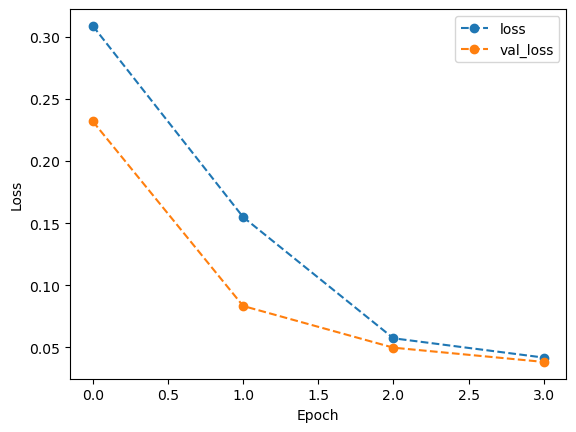

In [13]:
vae.visualize_loss()

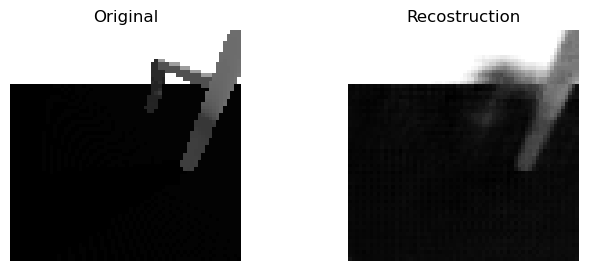

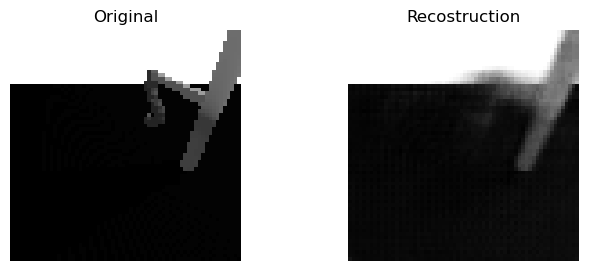

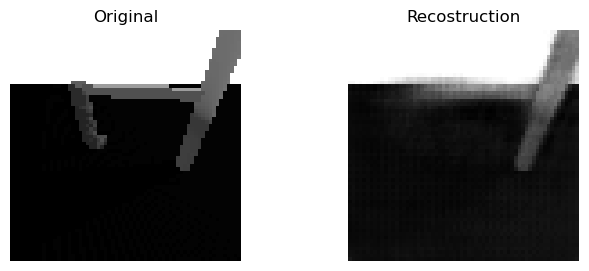

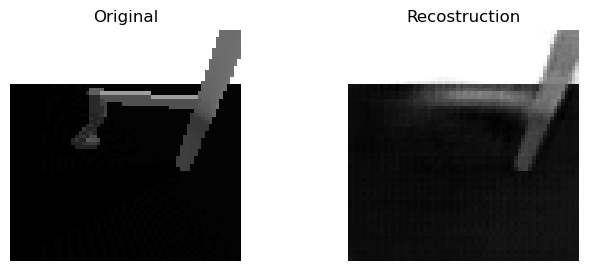

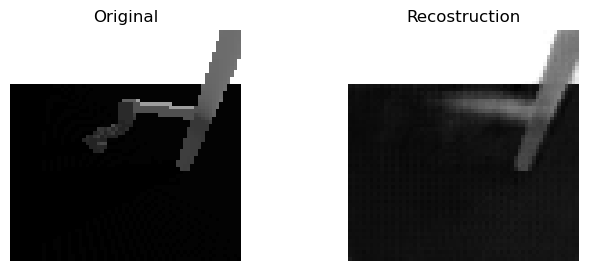

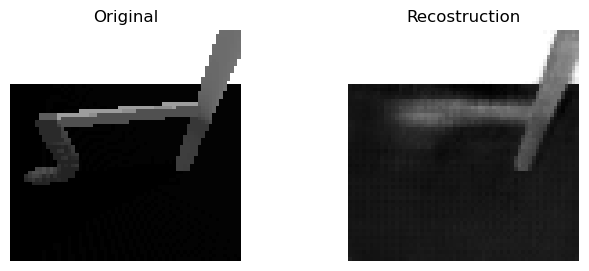

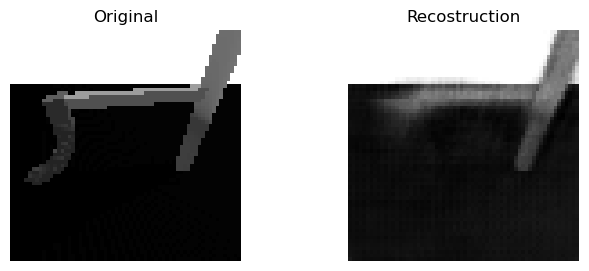

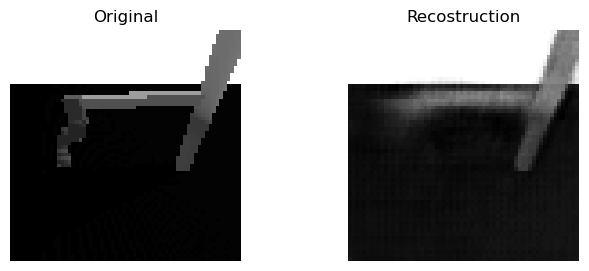

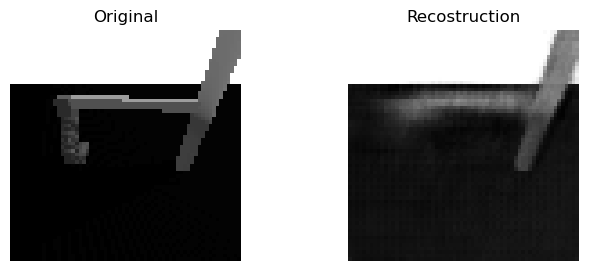

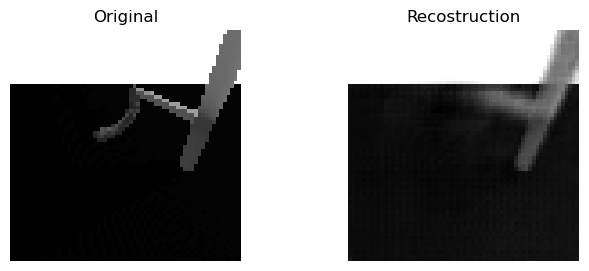

In [14]:
for i in range(10):
    vae.visualize_recostruction(X_train[36+i*47])

In [ ]:
X_train_z = vae.compute_latent_vector(X_train)
X_val_z = vae.compute_latent_vector(X_val)
X_test_z = vae.compute_latent_vector(X_test)

69/69 [==============================] - 6s 82ms/step


In [ ]:
save_latent_vectors(X_train_z, None, 'predictions/z_vae_gray_scale_train.pkl')
save_latent_vectors(X_val_z, None, 'predictions/z_vae_gray_scale_val.pkl')
save_latent_vectors(X_test_z, None, 'predictions/z_vae_gray_scale_test.pkl')